#### **Agenda:**
   - Recognition of world famous landmark
   - Standard CNN architecture like AlexNet and VGGNet
   - Transfer learning using VGGNet


###Problem Statement:

- Suppose you are working as Data Scientist in Google. You have been given with a task to automate the categorization of famous landmarks.

<center><img src='https://drive.google.com/uc?id=1-AXpfjw6eCpFvJRlbV5GGXnzCmin6vmL' ></center>

- The dataset is obtained by downloading the images of the 10 famous landmark from Google search.
- Using these images, you have to train a CNN model 
- For inference, the CNN model will be fed with an image like Google lens and it will output the most probable landmark category

### What is google lens ?

Please follow this who are not familiar : https://lens.google/


 

### What should be the performance metric ?
Accuracy is obtained by dividing the number of correct predictions  by the total number of samples


### Importing python package

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import random

plt.rcParams.update({'font.size': 14})

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

### Downloading the dataset

In [ ]:
!gdown 11LQILlalZGi_skLIipnpTyh-At77B_j6

In [ ]:
!unzip New_landmark_images.zip

#### What kind of preprocessing need to be applied ?
 - The image is normalized so that min-max range is 0-1 instead of 0-255 
 - All the images have been resized to (227,227,3)

#### **Quiz-1**
Why do we normalize the inputs ?

> (a) It makes the cost function faster to optimize

> (b) It makes the parameter initialization faster

> (c) It makes it easier to visualize the data

> (d) Normalization is another word for regularization--It helps to reduce variance

Ans : (a) It makes the cost function faster to optimize

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory("New_landmark_images/train/",shuffle =True, seed=123,image_size=(227, 227),batch_size=32)
val_data   = tf.keras.utils.image_dataset_from_directory("New_landmark_images/validation/",shuffle =False, seed=123,image_size=(227, 227),batch_size=32)
test_data = tf.keras.utils.image_dataset_from_directory("New_landmark_images/test/",shuffle =False, seed=123,image_size=(227, 227),batch_size=32)

from tensorflow.keras import layers 
data_preprocess = tf.keras.Sequential(
    name="data_preprocess",
    layers=[ layers.Rescaling(1.0/255),]
)

# Perform Data Processing on the train, val, test dataset
train_ds = train_data.map(lambda x, y: (data_preprocess(x), y))
val_ds = val_data.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocess(x), y))
  


- Is the dataset balanced ?
-- Yes
 > Each class in the training dataset has almost 70 images.
 > Each class in the validation dataset has almost 15 images.
 > Each class in the test dataset has almost 5 images.


- How manys classes do we have here ?
 -  10


- Lets look at the names of these 10 labels

In [ ]:
print(train_data.class_names)

- Now lets look into some images from each class

##How can you carry out the task of object classification ?

 1. Create a **CNN model from scratch** to classify the images
 2. Use **Transfer Learning** . What is transfer learning ?
    - We will dicuss it later
  


##1. Creating a new model from scratch  
  - You can build a Convolution neural network(CNN) model from scratch and use them to classify the data 
  - But
   - How many conv layers do you need to use?
   - Which **architecture should you choose ?**
   - How should you combine CNN / Pooling / FC layers to get the best performance ? 
   - Should you use 5x5 kernel or 3x3 kernel or 11x11 kernel?
   - Can you achieve a high accuracy if dataset is small in size ?
   - This will require lot of experimentation to get a model of very high accuracy
   - Also, training a deep neural network will require a lot of time
  -Instead of doing all the above experiment from scratch, we will use State-of-the-Art(SOTA) models and train it from scratch like VGGNet
  - Before going to VGGNet, we will first understand AlexNet 
 

### What is AlexNet ?

- AlexNet is the **first CNN to win ImageNet Competition in 2012.**
- It was primarily designed by **Alex** Krizhevsky.
- They achieved a **top 5 accuracy of 84.7%,** while runner-up was at 74!
- So, it was a huge achievement and We can say that, Alexnet started the CNN revolution.
- Neural networks had been around since 1970s and Theroy of CNN first came in 1989
- Why couldnt CV Reseachers implement CNNs earlier

**What is ImageNet Competition ?**

- The ImageNet Large Scale Visual Recognition Challenge, or ILSVRC, is an annual competition that uses subsets from the ImageNet dataset (1000 classes) and is designed to foster the development and benchmarking of state-of-the-art algorithms. 
- ImageNet is a large database or dataset of over 14 million images with 21000 labels. It was designed by academics intended for computer vision research. It was the first of its kind in terms of scale. Images are organized and labelled in a hierarchy.

For more details about imagenet:

 1.https://www.image-net.org/challenges/LSVRC/
 2.https://devopedia.org/imagenet









 

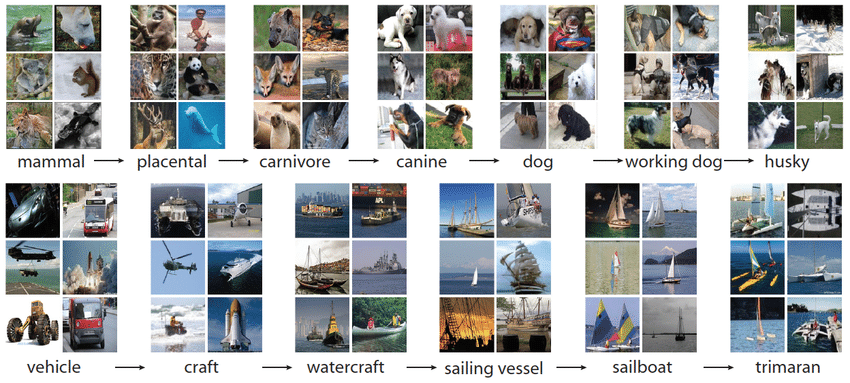

####What is top-k accuracy ?

- In many multiclass classification problems in Computer Vision Space, Topk (like top3, top 5) accuracy is a better measure of model performance. 
- Example, in recommender system it makes more sense to show top 3 or 5 recommended products to customer rather than just single top most recimmended product.

- In top-k accuracy, we get score if the right answer appears in top k guesses.

 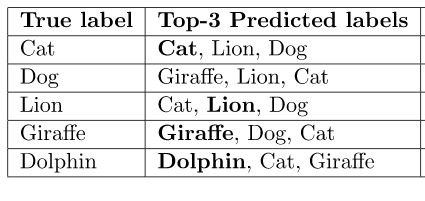

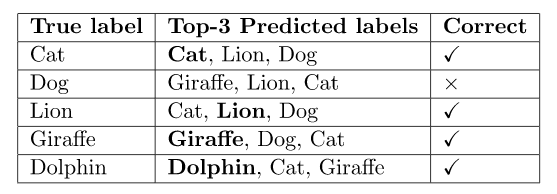

How Top-k accuracy helpful working with images ?
- In some cases, It is very diffcult to predict all labels correctly, **because some classes may have minute difference**
- Like pickup truck and mini van, What's the difference b/w them?
- Some of the Labellers might not know difference 
- We **cannot assume that 100% of the labels are correct**
- So Apart for Accuracy , it is intuitive to use **top-k accuracy another metric** for evaluting performace of models 

####  **What was so new about AlexNet?**
 1) **Graphics processing units (GPUs)**
- This is the first time, Someone **successfully trained a model using GPU**
- **GPUs have large number cores**(in thousands) which allow **parallel computing**
- So we can parallelize our model's computation on many threads


2) **Rectified linear unit (ReLU) activation**
- Before this (2012), tanh and Sigmoid was the commonly used activation function
- How did Relu improved performance?
 - **Better gradient propagation** Fewer vanishing gradient problems compared to Tanh
 - **Efficient computation**: ReLU is inexpensive compared to tanh and sigmoid because the latter require exponential operation which is expensive



3) **Regularization**
- With Regularization they were able to reduce overfitting 
- They used **Dropout** and **Data Augmentation** like HFlip, HFlip, rotations, Random 224x244 crops from 256x256 images



4) **Pooling layers**
- With Pooling, we can reduce the dimensions of feature maps
- Thus, it reduces the number of parameters to learn, making the model faster to train


5) **Depth**
- Increasing the Depth, helped in improving the learning capacity of the model


Now let's see the architecture of AlexNet


#### **Quiz-2**
An input image of shape (227, 227, 3) is convolved with (11, 11) kernel having 96 filter giving output of shape (217, 217, 96). What is the total no of parameters?

> (a) (11 * 11 * 3 +1) *96

> (b) 11 * 11 * 3 * 96

> (c) 96

> (d) None of the above

Ans : (a) (11 * 11 * 3 +1) *96. The total parameter = weight + bias . weight = 11 * 11 * 3 * 96  and bias = 96

<center> <img src="https://drive.google.com/uc?id=1H-aKMDFStj7GFbfGyiAJvB00G7m6jt3A"></center>
  <caption><center> <font color='blue'> Figure: <font color='blue'>  : AlexNet Architecture<br>  </center></caption>


<center><img src='https://drive.google.com/uc?id=1SKNQNRhW4Aw7sAFNXEWbkaBHfjnPSERX' ></center>
<caption><center> <font color='blue'> Figure: <font color='blue'>  : AlexNet layers Computation<br>  </center></caption>

  


- AlexNet has 5 CONV layers and 3 FC layers
- AlexNet has 60M parameters.The following table shows it's performance on ImageNet dataset [Click to know more](https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf) 

| Model Name | Number of params  | Top 1 Acc | Top 5 Acc
| --- | --- |  --- | --- |
| Alexnet | 60M  |  63.3 |   84.6




#### **Quiz-3**

Which of the following options can be used to reduce overfitting in deep learning models?

1. Increase architectural complexity
2. Use data augmentation 
3. Using dropouts
4. Add regularization


> (a) 1,2,3

> (b) 2,3,4

> (c) 1,3,4

> (d) All of these

Ans : (b) 2,3,4

#### **What are the shortcomings of AlexNet?**
- AlexNet is not very deep compared to later models like VGGNet. 
- Deep neural network are prefered due to the following reasons:
 - Expressive : A single layer is a linear function . Activation function is used to learn  complex non-linear function. 
    - Stacking multiple layers results in multiple successive nonlinearities and has a better chance to approximate higher complex functionality
 - Perceptive field : Consider that a cat's head cover 128x128 pixel region in image. 
    - Using a single convolution network will require 128x128 filter to capture it which will have a very high no of parameter. 
    - Stacked layers on the other hand can use 3x3 filter to see 128x128 pixel, with smaller number of parameters.
 - Generalization : Adding parameter to a single layer increase the memory of neural network . 
    - The neural network will memorize  input examples and will not generalize well. 
    - On the other hand, stacking many layers helps the network to breakdown the input into hierarchial structure of features. 
    - For example, the intial initial layers will recognize the edge of face, eye, nose while the latter layer will assemble them  and focus whether it is cat or dog

- AlexNet also uses a **filter size of 11x11** which is very **large and has high parameter**. Thus, it is **computantionally expensive**

- Although, AlexNet performed better than its previous architecture and achieved a top-5 accuracy of 84% on ImageNet,the accuracy of the model can be further improved by increasing the number of layers.
#### Can  you achieve the same functionality by a smaller filter ?
 - We can achieve this by using 3*3 filter instead of 11 * 11


    

### VGGNet 
- VGG19 won second place in 2014
- If we look at the architecture, it is very similar with AlexNet
- **It improves on AlexNet by being much deeper.** 
- VGG16 had 16 layers(13 convolution layers(CONV) +3 Fully connected (FC)).
-VGG19 has 19 layers(16 CONV +3 FC). 


<center> <img src="https://drive.google.com/uc?id=1xLiyqRCaGmGHmZIIToZsuBW69QVY38js"></center>
  <caption><center> <font color='blue'> Figure: <font color='blue'>  : VGG16 Architecture<br>  </center></caption>




<center> <img src="https://drive.google.com/uc?id=1DowFLEFRPCS-KieZTftVq8NKfF-kJj_a"></center>
  <caption><center> <font color='blue'> Figure: <font color='blue'>  VGG16 layers Computation<br>  </center></caption>

- **If we consider both architectures VGG and Alexnet, What are the differences b/w them ?**
 - It was uses only 3x3 filters, whereas Alexnet had 11x11, 3x3 and 5x5 filters
-**Which one is better: a 5x5 convolutional filter or two 3x3 filters applied in sequence?**
 - The difference is that two 3x3 filters applied in sequence have a total of 2 * 3 * 3 = 18 learnable parameters whereas a single 5x5 filter has 5 * 5 = 25 learnable weights. So, **two 3x3 filters has less parameter and so it is less computationally expensive.**
 - Two 3x3 filters has more non-linearity than 5x5 filters due to the fact that activation function has been applied 2 times. Having more non-linearity means the neural network is able to learn more complex nonlinear representation of input.

- VGG16 has **top 5 acc of 91.9 and top 1 acc of 74.4 on ImageNet dataset** which is way better than AlexNet [Click to know more](https://arxiv.org/pdf/1409.1556.pdf) 

| Model Name | Number of params | Top 1 Acc | Top 5 Acc
| --- | --- | --- | --- | 
| Alexnet | 60M | 63.3 | 84.6
| VGG16 | 138M | 74.4| 91.9
| VGG19 | 144M | 74.5| 92.0

#### **Quiz-4**

Increase the **number** of a convolutional layers would necessarily increase the performance of a convolutional neural network.

> (a) TRUE

> (b) FALSE

Ans : (a) TRUE

### Data Processing: Resizing, Standardization
- The input image is resized to (224,224,3) because VGGNet expects input image to be of (224,224,3) in size
- Also, we rescale the pixel values to lie between 0 and 1 by dividing it with 255. (since pixel values range from 0 to 255)


In [ ]:
BATCH_SIZE = 128
tf.random.set_seed(10)
np.random.seed(10)
train_ds = tf.keras.utils.image_dataset_from_directory("New_landmark_images/train/",shuffle =True, seed=123,image_size=(224, 224),batch_size=BATCH_SIZE)
val_ds   = tf.keras.utils.image_dataset_from_directory("New_landmark_images/validation/",shuffle =False, seed=123,image_size=(224, 224),batch_size=BATCH_SIZE)
test_ds = tf.keras.utils.image_dataset_from_directory("New_landmark_images/test/",shuffle =False, seed=123,image_size=(224, 224),batch_size=BATCH_SIZE)
from tensorflow.keras import layers 
data_preprocess = tf.keras.Sequential(
    name="data_preprocess",
    layers=[ layers.Rescaling(1.0/255),]
)

# Perform Data Processing on the train, val, test dataset
train_ds = train_ds.map(lambda x, y: (data_preprocess(x), y))
val_ds = val_ds.map(lambda x, y: (data_preprocess(x), y))
test_ds = test_ds.map(lambda x, y: (data_preprocess(x), y))

In [ ]:
# VGG 16 Model
# If the commented Conv2D layer is uncommented then it becomes VGG 19 
# FC layers are commented so that faster training occur
vgg16_model = tf.keras.Sequential([
        tf.keras.layers.Input(shape = (224 ,224, 3)),
        tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)),

        tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)),

        tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        #tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding= 'same',
        #                activation= 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)),

        tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding= 'same',
                        activation= 'relu'),
        #tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding= 'same',
        #                activation= 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)),

        tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding= 'same',
                        activation= 'relu'),
        tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding= 'same',
                        activation= 'relu'),
        #tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding= 'same',
        #                activation= 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides= (2,2)),

        tf.keras.layers.Flatten(),
        #tf.keras.layers.Dense(4096, activation= 'relu'),
        #tf.keras.layers.Dropout(0.5),
        #tf.keras.layers.Dense(4096, activation= 'relu'),
        #tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation= 'softmax')
        ])

                  

In [ ]:
vgg16_model.summary()

In [ ]:
import functools
from tensorflow.keras.optimizers import Adam,SGD
top5_acc = functools.partial(tf.keras.metrics.SparseTopKCategoricalAccuracy())

opt = SGD(learning_rate=0.005, momentum=0.99)
vgg16_model.compile(
    optimizer=opt,
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)
print(vgg16_model.optimizer.get_config())
history = vgg16_model.fit(train_ds,  epochs=5,
                    validation_data=val_ds
                   )

In [ ]:
# # Save the entire model as a SavedModel.
# !mkdir -p saved_vgg16model_scratch
# vgg16_model.save('saved_vgg16model_scratch/vgg16_model')

In [ ]:
# Saving the Model
vgg16_model.save("vgg16_model_scratch.h5")

In [ ]:
# Downloading the saved model from Google drive
!gdown 1dwwgrguj9NDIgdnFfdnYZoMsBFVMD3xV

# Loading the model
vgg16_model_scratch = tf.keras.models.load_model("/content/vgg16_model_scratch.h5")

In [ ]:
def training_plot(metrics, history):
  f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric], ls='dashed')
    ax[idx].set_xlabel("Epochs")
    ax[idx].set_ylabel(metric)
    ax[idx].plot(history.history['val_' + metric]);
    ax[idx].legend([metric, 'val_' + metric])

In [ ]:
training_plot(['loss', 'accuracy'], history)

In [ ]:
# Evaluate the model
loss, acc = vgg16_model_scratch.evaluate(test_ds, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

* Our model is not doing good as we are getting only 11.63% accuracy on our test data

* This is because our dataset size is small when it comes to train SOTA CNN model such as VGG from scratch

## How you are going to improve the performance of model with small dataset ?

* Collecting more images for each class can be one of the solutions - but its time consuming and also sometimes collecting more images is an expensive task.

* Dont worry!! We have another approach to follow known as "Transfer learning"




Before we discuss the process of transfer learning, let’s quickly take a step back and review the primary reasons for the boom in deep learning:

- Availability of bigger and better-quality datasets like ImageNet 
- Better compute available; i.e., faster and cheaper GPUs
- Better algorithms (model architecture, optimizer, and training procedure)
- Availability of pretrained models that have taken months to train but can be quickly reused
- The last point is probably one of the biggest reasons for the widespread adoption of deep learning by the masses.
  -  If every training task took a month, not more than a handful of researchers with deep pockets would be working in this area. 
  - Thanks to transfer learning, the underappreciated hero of training models, we can now modify an existing model to suit our task in as little as a few minutes



For example- 


 <center>  <img src='https://drive.google.com/uc?id=1kdqDVgJDg8Au02WGoSizy_25oz5QVmjk'>
   <caption><center> <font color='blue'> Figure: <font color='blue'>  : Transfer learning in real time <br>  </center></caption>













 



  ## What is Transfer Learning in CNN ?

  - Transfer learning is a mechanism where a CNN model trained for a task is reused as the starting point for a model on a second task

  - In transfer learning, we use a pre-trained model as a starting point for some other task.
  
  - **Why we require Transfer learning ?**
   - Researcher around the world have spent a lot of time in building good models 
   - If we want to transfer knowledge from one model to another, we want to reuse more of the generic layers (closer to the input) and fewer of the task-specific layers (closer to the output). 
   - In other words, we want to remove the last few layers (typically the fully connected layers) so that we can utilize the more generic ones, and add layers that are geared toward our specific classification task.
   - Once training begins, the generic layers (which form the majority of our new model) are kept frozen (i.e., they are unmodifiable), whereas the newly added task-specific layers are allowed to be modified. 
   - This is how transfer learning helps quickly train new models

<img src='https://drive.google.com/uc?id=14w0JUnKfbC8XkaRIsZjdAsiAMSLYclVo'>

- So, we can use a model which has been trained on Imagenet having millions of images like VGG Net and change the last few FC layers according to the number of classes in our task.
- This help us in **reducing the training time** as we are only training the last few FC layers while using the pretrained weight for the Conv layers
- Also, the model trained by transfer learning is able to achieve a **high accuracy**

Now, we will be carrying out, transfer learning using VGGNet (standard CNN architecture) 
 - The pretrained CONV layers from the VGG16 is used
 - Along, with that we add a FC layer having the no of neuron equal to number of output class
 - In the process of training, only this FC layer is trained as all the other layers are freezed  

In [ ]:

pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=[224,224, 3])
pretrained_model.trainable=False
vgg16_model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])



####**Quiz-5**


How did you lock or freeze a layer from retraining?

> (a) tf.freeze(layer)

> (b) tf.layer.frozen = True

> (c) tf.layer.locked = True

> (d) layer.trainable = False

Ans : (d) layer.trainable = False

- The tf.keras.applications.VGG16 will load the weight of VGG model trained on imagenet dataset. The include_top = False ensures that we have only the CONV layers and no FC layers
- The command pretrained_model.trainable=False ensures that the weights for these layer is freezed

In [ ]:
vgg16_model.summary()

In [ ]:
import functools
top5_acc = functools.partial(tf.keras.metrics.SparseTopKCategoricalAccuracy())

vgg16_model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = vgg16_model.fit(train_ds, epochs=5,
                    validation_data=val_ds)

- **By training VGG19 using transfer learning we were able to obtain validation accuracy of 0.8452 after 5 epochs where as VGGNet created from scratch had validation accuracy of 0.15**
- Hence using transfer learnng we obtain higher accuracy and require less training 


In [ ]:
# Save the entire model as a SavedModel.
# !mkdir -p saved_vgg16model_pretrained
# vgg16_model.save('saved_vgg16model_pretrained/vgg16_model')

In [ ]:
# Saving the Model
vgg16_model_pretrained = vgg16_model.save("vgg16_model_pretrained.h5")

In [ ]:
# Download the saved model from Google Drive
!gdown 15SJVnO_XxBnHWy98kJe4k6sQ1u3a6tnA

#Loading the model
vgg16_model_pretrained = tf.keras.models.load_model("/content/vgg16_model_pretrained.h5")

In [ ]:
def training_plot(metrics, history):
  f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
  for idx, metric in enumerate(metrics):
    ax[idx].plot(history.history[metric], ls='dashed')
    ax[idx].set_xlabel("Epochs")
    ax[idx].set_ylabel(metric)
    ax[idx].plot(history.history['val_' + metric]);
    ax[idx].legend([metric, 'val_' + metric])

In [ ]:
training_plot(['loss', 'accuracy'], history)

In [ ]:
# Evaluate the model
loss, acc = vgg16_model_pretrained.evaluate(test_ds, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

In [ ]:
def plot_image(pred_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(pred_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ".format(class_names[predicted_label],
                                100*np.max(pred_array),
                                ),
                                color=color)


Now, let's visualize the model prediction on the test dataset

In [ ]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)
images = tf.concat([x for x, y in test_ds], axis=0)
y_pred = vgg16_model.predict(test_ds)
class_names = test_data.class_names

# Randomly sample 15 test images and plot it with their predicted labels, and the true labels.
indices = random.sample(range(len(images)), 15)
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(4*num_cols, 2*num_rows))
for i,index in enumerate(indices):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(y_pred[index], true_categories[index], images[index])

plt.tight_layout()
plt.show()

### **What are the shortcomings of VGG Net?**
- But If we look at the number of parameters, it has **144M parameters!** and which takes aprox 500 Mb to store!**
- It is the **major drawback of this network**
- Majority of the parameters are coming from last 3 FC layers at the last (with 120 million paras!)
- And Convolutional part only has 20 million weights
- Conv are more imp. than FC layers, as they capture the feature from the image
- **How can we  overcome these shortcomings?**
 - So, we will try to reduce the parameters in the last FC layers by using Global Average Pooling (GAP) while going from Conv layers to FC layers.This will help in reducing the number of parameters.

 - It works similar to Max Pooling layer.
 - Last Conv layer of VGG19 has a dimension of 7 x 7 x 512
 - Every 7x7 features map is averaged to a single value
 - So 7x7x512 -> GAP -> 1x1x512 (which is a dense layer)
 - with GAP we can get rid of that 120 M params And it **gives good performance** in practice

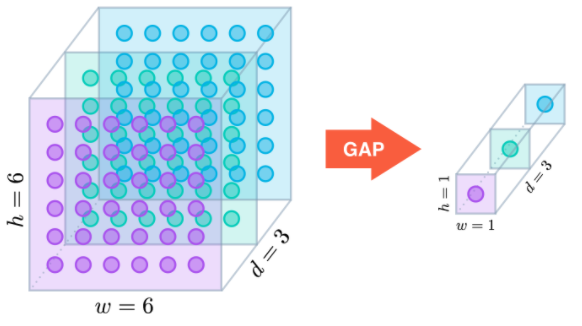

- This give rise to the next architecture of **GoogleNet(Inception)**

####**Quiz-6**

What is the total number of parameter in the 1st FC layer (7x7x512,4096) of VGGNet ?

> (a) (7 * 7 * 512  + 1) * 4096   

> (b) 7 * 7 * 512 * 4096 

> (c) 4096 

> (d) None of the above

Ans : (a) (7* 7* 512  + 1) * 4096 . This is the bottleneck for the VGGNet as it has 102M parameters

###Conclusion
  - The AlexNet, VGGNet trained on the ImageNet achieves the following:




| Model Name | Number of params | Top 1 Acc | Top 5 Acc
| --- | --- | --- | --- | 
| Alexnet | 60M | 63.3 | 84.6
| VGG16 | 138M | 74.4| 91.9
| VGG19 | 144M | 74.5| 92.0

  - Trained the CNN model like VGGNet from scratch
  - Trained the CNN model by using Tranfer Learning of VGGNet and achieved better performance 
  


###Exercise:
  1. Does training the model VGGNet for more epoch  improve the performance ?
  2. Does increasing the number of FC layers in VggNet while doing transfer learning improve the accuracy of the model ?
  3. Does training the model with 3-4 CNN layers improve performance ?